In [425]:
#data training using cross-val and grid search
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
df = pd.read_csv("cancer_stat.csv")

In [109]:
df.head()

avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0               469             164.9          489.8      61898   
1                70             161.3          411.6      48127   
2                50             174.7          349.7      49348   
3               202             194.8          430.4      44243   
4                26             144.4          350.1      49955   

   povertypercent  medianage  medianagemale  medianagefemale  percentmarried  \
0            11.2       39.3           36.9             41.7            52.5   
1            18.6       33.0           32.2             33.7            44.5   
2            14.6       45.0           44.0             45.8            54.2   
3            17.1       42.8           42.2             43.4            52.7   
4            12.5       48.3           47.8             48.9            57.8   

   pctnohs18_24  ...  pctunemployed16_over  pctprivatecoverage  \
0          11.5  ...                   8.0                75.1   
1           6.1  ...                   7.8                70.2   
2          24.0  ...                   7.0                63.7   
3          20.2  ...                  12.1                58.4   
4          14.9  ...                   4.8                61.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               32.9                    14.0  81.780529   
1                43.6               31.1                    15.3  89.228509   
2                34.9               42.1                    21.1  90.922190   
3                35.0               45.3                    25.0  91.744686   
4                35.1               44.0                    22.7  94.104024   

   pctblack  pctasian  pctmarriedhouseholds  birthrate  
0  2.594728  4.821857             52.856076   6.118831  
1  0.969102  2.246233             45.372500   4.333096  
2  0.739673  0.465898             54.444868   3.729488  
3  0.782626  1.161359             51.021514   4.603841  
4  0.270192  0.665830             54.027460   6.796657  

[5 rows x 24 columns]

In [111]:
len(df.columns)

24

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgdeathsperyear        3047 non-null   int64  
 1   target_deathrate        3047 non-null   float64
 2   incidencerate           3047 non-null   float64
 3   medincome               3047 non-null   int64  
 4   povertypercent          3047 non-null   float64
 5   studypercap             3047 non-null   float64
 6   binnedinc               3047 non-null   object 
 7   medianage               3047 non-null   float64
 8   medianagemale           3047 non-null   float64
 9   medianagefemale         3047 non-null   float64
 10  percentmarried          3047 non-null   float64
 11  pctnohs18_24            3047 non-null   float64
 12  pcths18_24              3047 non-null   float64
 13  pctbachdeg18_24         3047 non-null   float64
 14  pcths25_over            3047 non-null   

In [115]:
sns.set_context("talk", font_scale=1.1)

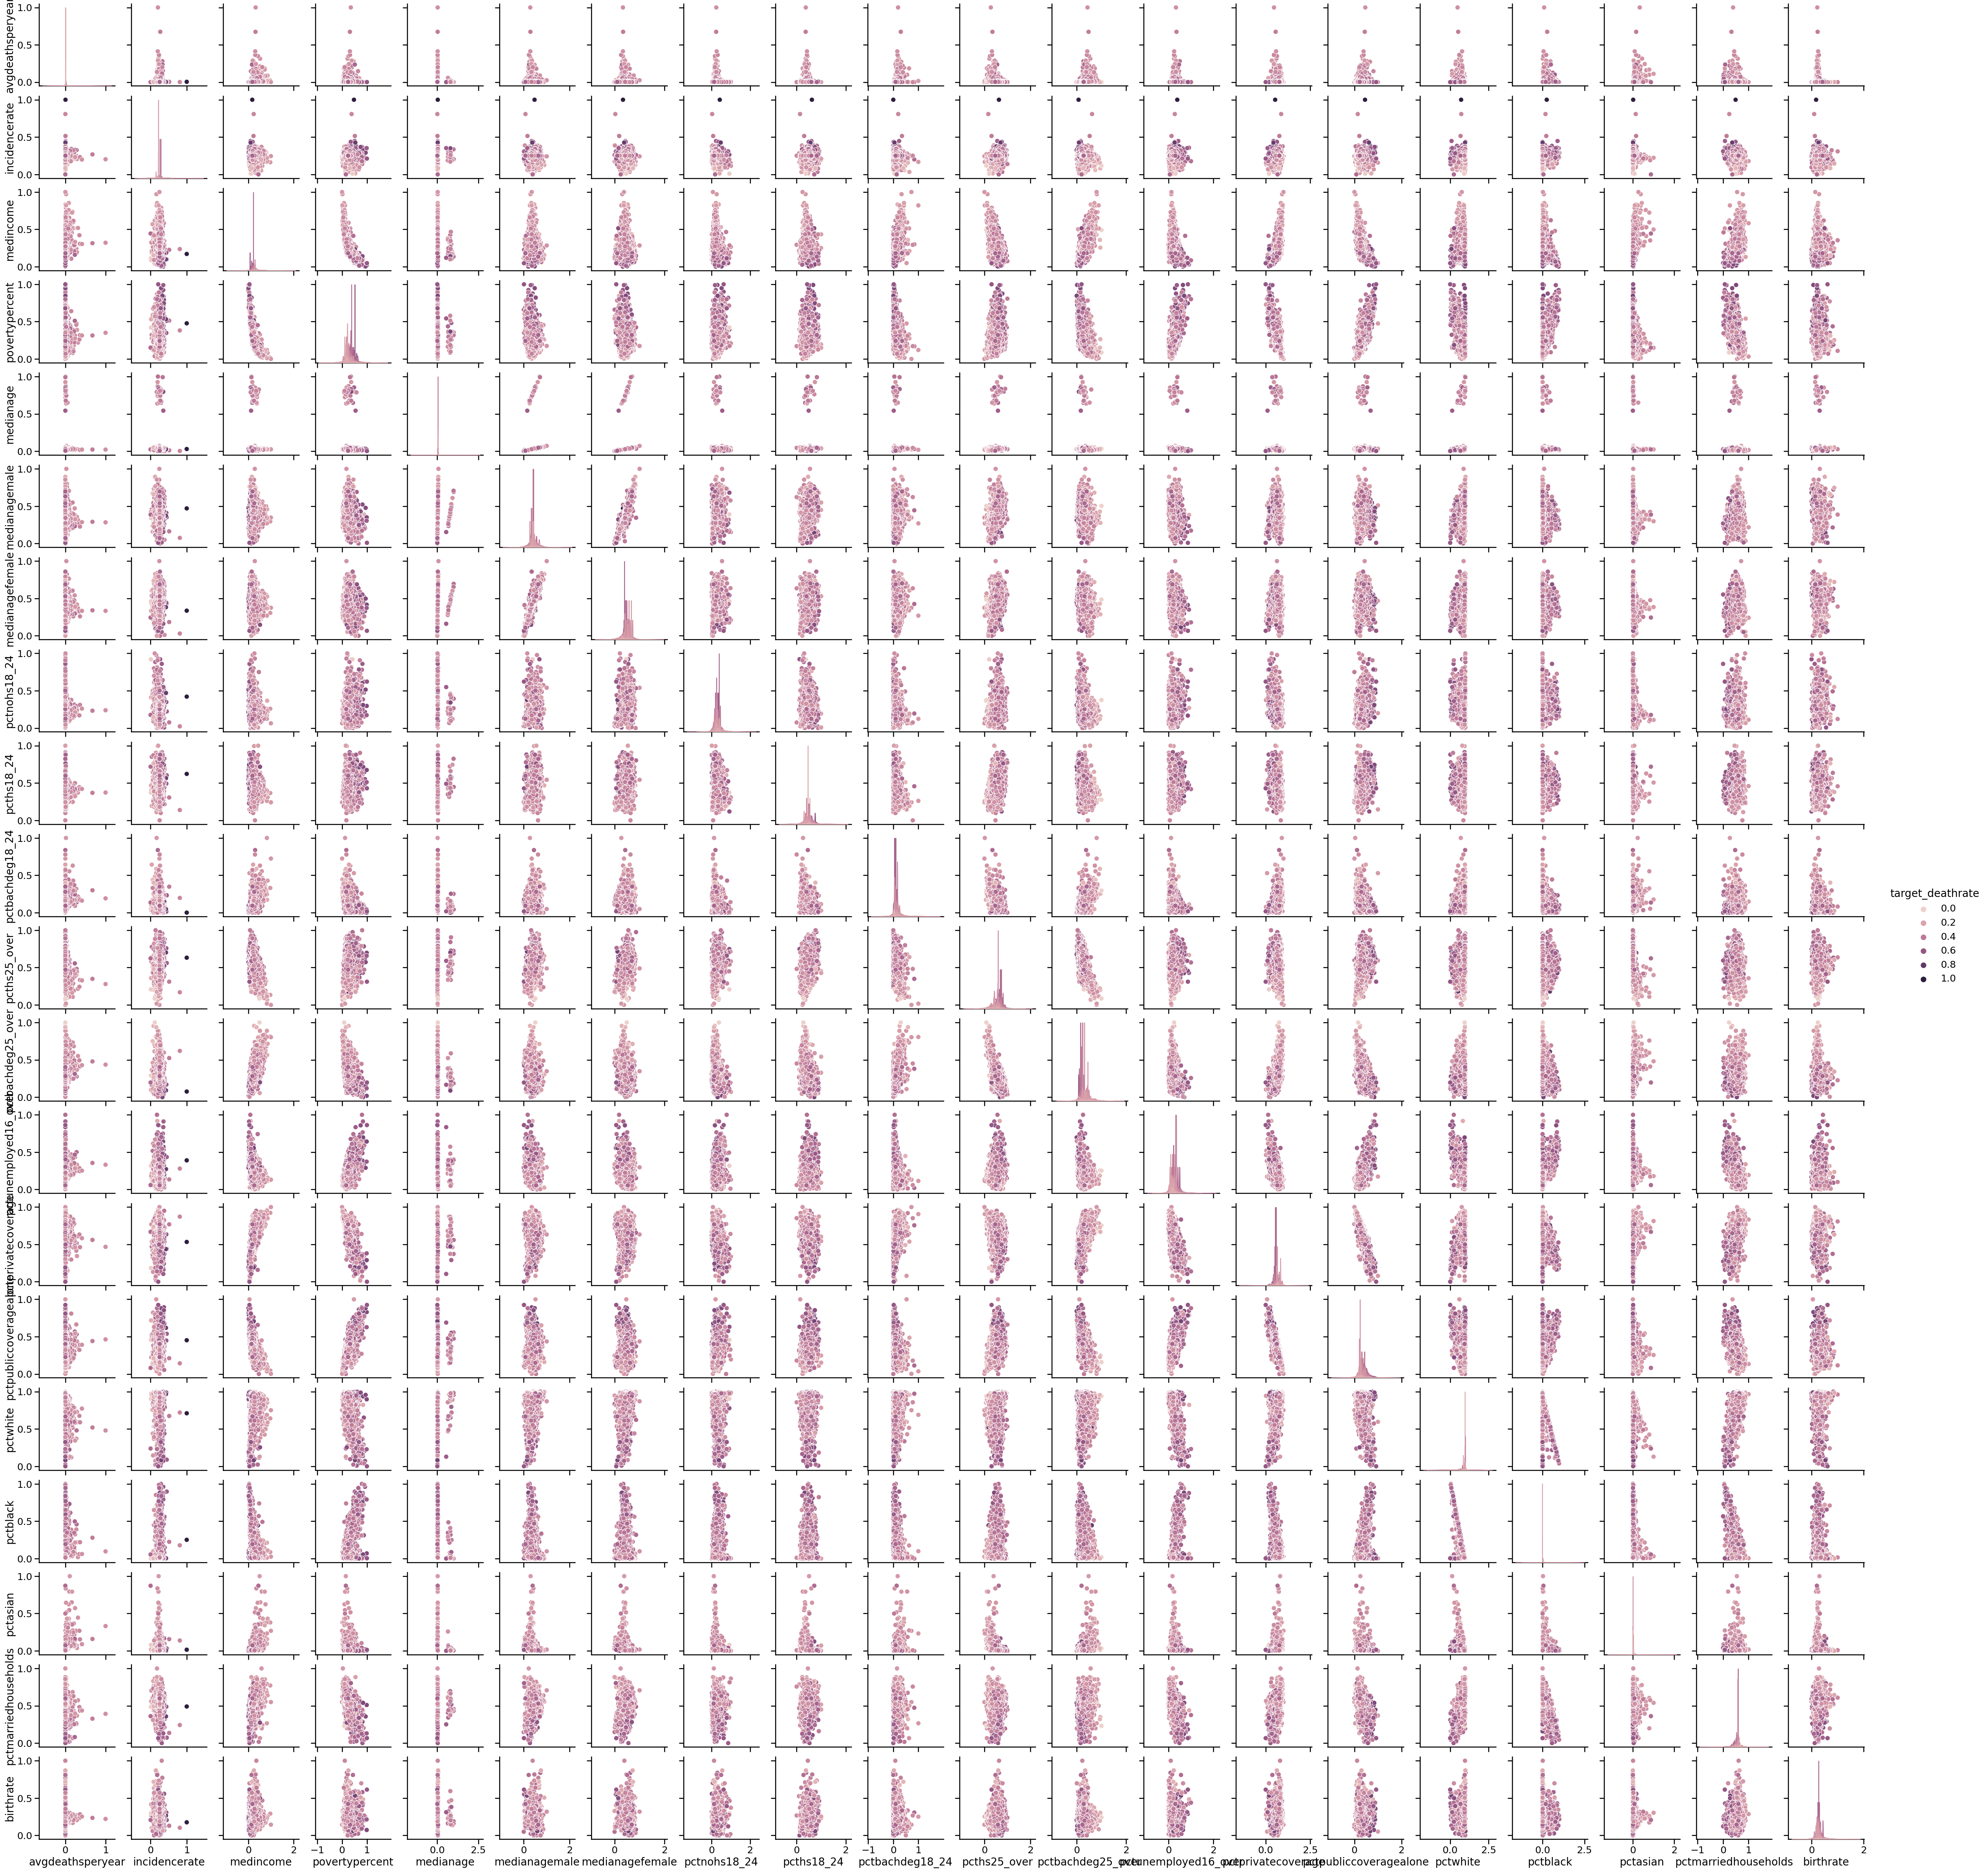

In [422]:
# Relationships between features
sns.pairplot(data=df_norm,diag_kind='kde',hue='target_deathrate')

In [129]:
#remove columns 
dropcolumns=['percentmarried']
df_norm = df_norm.drop(dropcolumns,axis=1)

In [131]:
df.isnull().sum()

avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
povertypercent            0
medianage                 0
medianagemale             0
medianagefemale           0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctunemployed16_over      0
pctprivatecoverage        0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [133]:
#get %
100* df.isnull().sum() / len(df)

avgdeathsperyear          0.0
target_deathrate          0.0
incidencerate             0.0
medincome                 0.0
povertypercent            0.0
medianage                 0.0
medianagemale             0.0
medianagefemale           0.0
pctnohs18_24              0.0
pcths18_24                0.0
pctbachdeg18_24           0.0
pcths25_over              0.0
pctbachdeg25_over         0.0
pctunemployed16_over      0.0
pctprivatecoverage        0.0
pctpubliccoveragealone    0.0
pctwhite                  0.0
pctblack                  0.0
pctasian                  0.0
pctmarriedhouseholds      0.0
birthrate                 0.0
dtype: float64

In [119]:
scaler = MinMaxScaler()

In [121]:
# Normalize the DataFrame
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [63]:
#df['Potability'] = removepotability.values

In [135]:
df_norm.head()

avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0          0.033269          0.347080       0.286893   0.381164   
1          0.004783          0.335203       0.209129   0.247459   
2          0.003355          0.379413       0.147574   0.259314   
3          0.014207          0.445727       0.227824   0.209748   
4          0.001642          0.279446       0.147971   0.265207   

   povertypercent  medianage  medianagemale  medianagefemale  pctnohs18_24  \
0        0.180995   0.028253       0.342790         0.447005      0.179407   
1        0.348416   0.017783       0.231678         0.262673      0.095164   
2        0.257919   0.037726       0.510638         0.541475      0.374415   
3        0.314480   0.034070       0.468085         0.486175      0.315133   
4        0.210407   0.043211       0.600473         0.612903      0.232449   

   pcths18_24  ...  pcths25_over  pctbachdeg25_over  pctunemployed16_over  \
0    0.544828  ...      0.331924           0.430730              0.262069   
1    0.308966  ...      0.391121           0.508816              0.255172   
2    0.504828  ...      0.454545           0.340050              0.227586   
3    0.568276  ...      0.509514           0.171285              0.403448   
4    0.593103  ...      0.547569           0.314861              0.151724   

   pctprivatecoverage  pctpubliccoveragealone  pctwhite  pctblack  pctasian  \
0            0.754286                0.259091  0.797112  0.030190  0.113138   
1            0.684286                0.288636  0.880051  0.011275  0.052704   
2            0.591429                0.420455  0.898912  0.008606  0.010932   
3            0.515714                0.509091  0.908071  0.009106  0.027250   
4            0.561429                0.456818  0.934344  0.003144  0.015623   

   pctmarriedhouseholds  birthrate  
0              0.542157   0.286917  
1              0.406297   0.203182  
2              0.571001   0.174879  
3              0.508852   0.215878  
4              0.563423   0.318700  

[5 rows x 21 columns]

In [137]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [139]:
percent_nan = percent_missing(df_norm)

In [143]:
#visualize
#sns.barplot(x=percent_nan.index,y=percent_nan)
#plt.xticks(rotation=90);

In [145]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgdeathsperyear        3047 non-null   float64
 1   target_deathrate        3047 non-null   float64
 2   incidencerate           3047 non-null   float64
 3   medincome               3047 non-null   float64
 4   povertypercent          3047 non-null   float64
 5   medianage               3047 non-null   float64
 6   medianagemale           3047 non-null   float64
 7   medianagefemale         3047 non-null   float64
 8   pctnohs18_24            3047 non-null   float64
 9   pcths18_24              3047 non-null   float64
 10  pctbachdeg18_24         3047 non-null   float64
 11  pcths25_over            3047 non-null   float64
 12  pctbachdeg25_over       3047 non-null   float64
 13  pctunemployed16_over    3047 non-null   float64
 14  pctprivatecoverage      3047 non-null   

In [156]:
df_norm.corr()['target_deathrate'].sort_values()

pctbachdeg25_over        -0.485477
medincome                -0.428615
pctprivatecoverage       -0.386066
pctmarriedhouseholds     -0.293325
pctbachdeg18_24          -0.287817
pctasian                 -0.186331
pctwhite                 -0.177400
avgdeathsperyear         -0.090715
birthrate                -0.087407
medianagemale            -0.021929
medianage                 0.004375
medianagefemale           0.012048
pctnohs18_24              0.088463
pctblack                  0.257024
pcths18_24                0.261976
pctunemployed16_over      0.378412
pcths25_over              0.404589
povertypercent            0.429389
pctpubliccoveragealone    0.449358
incidencerate             0.449432
target_deathrate          1.000000
Name: target_deathrate, dtype: float64

In [286]:
## cross validation with cross_val_score
X = df_norm.drop('target_deathrate',axis=1)
y = df_norm['target_deathrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [356]:
model = Ridge(alpha=1)

In [358]:
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [360]:
scores

array([-0.00467041, -0.00526373, -0.00458998, -0.00399027, -0.00380202])

In [362]:
abs(scores.mean())

0.004463280876721169

In [364]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [366]:
y_pred = model.predict(X_test)

In [368]:
mean_squared_error(y_test,y_pred)

0.0040586754864361

In [ ]:
######################### now with cross_validate

In [336]:
model = Ridge(alpha=1)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [340]:
#scoring options # https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [342]:
dfscores=pd.DataFrame(scores)
dfscores.head()

fit_time  score_time  test_neg_mean_absolute_error  \
0  0.003908    0.002369                     -0.050342   
1  0.002504    0.001863                     -0.053546   
2  0.003411    0.003396                     -0.052282   
3  0.003283    0.001738                     -0.046527   
4  0.002416    0.002155                     -0.046122   

   test_neg_mean_squared_error  test_max_error  
0                    -0.004670       -0.311164  
1                    -0.005264       -0.467597  
2                    -0.004590       -0.206794  
3                    -0.003990       -0.232066  
4                    -0.003802       -0.238250

In [344]:
dfscores.mean()

fit_time                        0.003104
score_time                      0.002304
test_neg_mean_absolute_error   -0.049764
test_neg_mean_squared_error    -0.004463
test_max_error                 -0.291174
dtype: float64

In [348]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [351]:
y_pred = model.predict(X_test)

In [354]:
mean_squared_error(y_test,y_pred)

0.0040586754864361

In [376]:
#help(ElasticNet)

In [388]:
base_elastic_model = ElasticNet()

In [390]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [397]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=1)

In [399]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [402]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [405]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [408]:
gridresults= pd.DataFrame(grid_model.cv_results_)

In [411]:
y_pred = grid_model.predict(X_test)

In [414]:
mean_squared_error(y_test,y_pred)

0.008537541235292106